# ******************************Assignment 2 Question************************************

# Assignment 2 - Transient Conduction

Solve the following problem and explain your results.

## Problem 1 - Transient Conduction in a Plane Wall

The problem we consider is that of a plane wall initially at 100$^\circ$C with its outer surfaces exposed to an ambient temperature of 0$^\circ$C.  The wall has a thickness 2*L* and may be considered to have an infinite height and a unit depth. The domain is shown schematically below:

![PlaneWall](2-PlaneWall.png)

Initially, the wall only feels the effect of the ambient air very near the surface and thus, the temperature profile inside the solid is quite steep in the vicinity of the surface.  An analytical solution for this problem involves several (at least 4) terms of a Fourier series.  After some time, however, the influence of the ambient air will have reached the center of the wall and the analytical solution can be approximated by the first term of the Fourier series (see, for example, *Fundamentals of Heat and Mass Transfer* by Incropera et al.). To study the order of accuracy of the fully implicit first and second order time discretization schemes, we will consider the cooling process during a period past the initial transient where the one-term Fourier solution is valid.

The parameters for the problem are:

$$ Bi = \frac{h L}{k}= 1.0 $$

$$ T_i = 100^\circ C $$

$$ T_{\infty}= 0^\circ C $$

The one-term Fourier solution for this problem is:

$$
\frac{T-T_{\infty}}{T_i-T_{\infty}}=C_1 \exp\left(-\zeta^2\frac{\alpha t}{L^2}\right)\cos\left(\zeta \frac{x}{L}\right)
$$

where:

$$ T = T(x,t) $$

$$ \alpha = \frac{k}{\rho c_p} $$

$$ C_1 = 1.1191 $$

$$ \zeta = 0.8603 $$

The solution to this problem at the two different dimensionless time levels of interest is:

$$ \text{at } \frac{\alpha t_1}{L^2}= 0.4535,~~~ T(0,t_1)= 80^\circ C $$

$$ \text{at } \frac{\alpha t_2}{L^2}= 3.2632,~~~ T(0,t_2)= 10^\circ C $$

To solve this problem, initialize the temperature field using the analytical solution at $\alpha t_1/L^2 = 0.4535$. This avoids the need for a very small timestep during the initial transient when solution is changing rapidly. Then, use your code to calculate the temporal variation of the temperature field over the time period described above.  Solve the problem by employing 2, 4, 8, 16, and 32 time steps using both the first and second order implicit schemes.

At the end of each run, calculate the absolute average error, $\overline{e}$, using the formula:

$$
\overline{e}= \frac{1}{N_{CV}} \sum_{i=1}^{N_{CV}} |e(i)|
$$

where

$$ e(i) = T_{exact}(i) - T(i) $$ 

Then, for each scheme, plot your results of $\overline{e}$ vs. $\Delta t$ (on a log-log scale) and find the value of $p$ in the expression:

$$
\overline{e}= c (\Delta t)^p
$$

where $p$ represents the order accuracy of the transient scheme. Also show a separate plot of T(0,$t_2$) verses the number of timesteps used for each scheme employed.

Repeat this problem on at least three different grids to demonstrate grid independence of the solution.

**Bonus**: Solve the same problem using the Crank-Nicolson scheme and compare the results.


# ******************************Assignment 2 Solution*************************************

## Statement of the Problem

In this problem, a plane wall is taken into consideration which has a thickness of 2L, infinite height and unit depth. The initial temperature of the wall is 100$^\circ$C. As it is exposed to an ambient temperature of 0$^\circ$C so heat is transferred from wall to the ambient. This cooling process is assumed to take place during a period past the initial transient where the one-term Fourier solution is valid. The fully implicit first and second order time discretization schemes will be applied to solve the problem using 2, 4, 8, 16, and 32 time steps.

## Assumptions

1.	In the beginning, the wall only feels the effect of the ambient air very near the surface.
2.	With the passage of time, the influence of ambient air will reach the centre of the wall.
3.	The cooling process during a period past the initial transient is considered, so that one-term Fourier solution can be applied.


## List of Parameters

Parameters along with their values are given below


Parameters          | Valiue                     | Remarks
:----------:        | :------------------------: |:------------------------:
h                   | 1 [W/m$^2\cdot$K]          |Assumed for simplicity
L                   | 1 [m]                      |Assumed for simplicity
k                   | 1 [W/m$\cdot$K]            |Assumed for simplicity
$\alpha$            | 1 [m^2/s]                  |Assumed for simplicity
$\rho$              | 1 [kg/m^3]                 |Assumed for simplicity
$c_p $              | 1 [J/kgK]                  |Assumed for simplicity
$B_i $              | 1                          |Given
$T_i $              | 100 [$^\circ$C]            |Given
$T_{\infty}$        | 0 [$^\circ$C]              |Given
$C_1$               | 1.1191                     |Given constant
$\zeta $            | 0.8603                     |Given constant


## Given Conditions

Two conditions at the two different dimensionless time levels are:

$$ \text{at } \frac{\alpha t_1}{L^2}= 0.4535,~~~ T(0,t_1)= 80^\circ C $$

$$ \text{at } \frac{\alpha t_2}{L^2}= 3.2632,~~~ T(0,t_2)= 10^\circ C $$

## Analytical Solution

Analytically the one-term Fourier solution for this problem is given by:

$$
\frac{T-T_{\infty}}{T_i-T_{\infty}}=C_1 \exp\left(-\zeta^2\frac{\alpha t}{L^2}\right)\cos\left(\zeta \frac{x}{L}\right)
$$

$$ \text{for } \frac{\alpha t_1}{L^2}= 0.4535 $$ and replacing the value of the parameters, the equation stands:

$$
\frac{T_1 - 0}{100 - 0} = 1.1191 \exp\left(-0.8603^2 X  0.4535 \right)\cos\left(0.8603 \frac{x}{1}\right)
$$
Simplifying further gives:
$$
T_1  = 111.91 \exp\left(-0.33564 \right)\cos\left(0.8603 x\right)
$$

$$ \text{for } \frac{\alpha t_2}{L^2}= 3.2632 $$ and replacing the value of the parameters, the equation stands:

$$
\frac{T_2 - 0}{100 - 0} = 1.1191 \exp\left(-0.8603^2 X  3.2632 \right)\cos\left(0.8603 \frac{x}{1}\right)
$$
Simplifying further gives:
$$
T_2  = 111.91 \exp\left(-2.41514 \right)\cos\left(0.8603 x\right)
$$

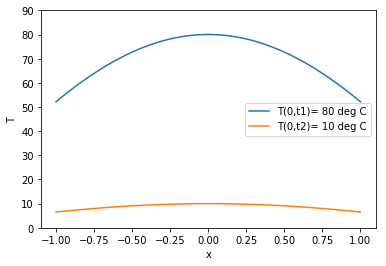

In [838]:
%matplotlib inline
import numpy as np
import matplotlib
x = np.linspace(-1,1,100)
T1 = 111.91*np.exp(-0.33564)*np.cos(0.8603*x)
T2 = 111.91*np.exp(-2.415146825)*np.cos(0.8603*x)
import matplotlib.pyplot as plt
plt.plot(x, T1 , '-', label='T(0,t1)= 80 deg C')
plt.plot(x, T2 , '-', label='T(0,t2)= 10 deg C')
plt.ylabel("T")
plt.xlabel("x")
plt.legend()
plt.ylim(0,90)
plt.show()

From page 284 of Fundamentals of Heat and Mass Transfer by Incropera, the shape temperature profile is shown like this 

![tempProfile](tempProfile.png)

which is analogus to the analytical solution presented above

## Numerical Solution

## Boundary Conditions

For the numerical solution of the problem, it is required to set up appropriate boundary conditions. From the analytical temperature profile of the problem, it is observed that the temperature profile is symmetric about the axis of the wall i.e., from x=0 to x=L.
Hence, one boundary is at x = 0 and the other boundary is at x = L.      

### At x = 0

At this boundary, temperature at any time will be maximum and hence the temperature gradient will be zero. For this, Neumann boundary condition will be imposed at this boundary.

### At x = L

At this boundary, heat flux is entering in the form of conduction and leaving the boundary in the form of convection. So, Robin boundary condition will be imposed upon this boundary.

In [839]:
import numpy as np

class Grid:
    """Class defining a one-dimensional Cartesian grid"""

    def __init__(self, lx, ly, lz, ncv):
        """Constructor
            lx .... total length of domain in x-direction [m]
            ly .... total length of domain in x-direction [m]
            lz .... total length of domain in x-direction [m]
            ncv ... number of control volumes in domain
        """
        # Store the number of control volumes
        self._ncv = ncv

        # Calculate the control volume length
        dx = lx/float(ncv)

        # Calculate the face locations
        self._xf = np.array([i*dx for i in range(ncv+1)])

        # Calculate the cell centroid locations
        self._xP = np.array([self._xf[0]] +
                            [0.5*(self._xf[i]+self._xf[i+1]) for i in range(ncv)] +
                            [self._xf[-1]])

        # Calculate face areas
        self._Af = ly*lz*np.ones(ncv+1)

        # Calculate the outer surface area for each cell
        self._Ao = (2.0*dx*ly + 2.0*dx*lz)*np.ones(ncv)

        # Calculate cell volumes
        self._vol = dx*ly*lz*np.ones(ncv)

    @property
    def ncv(self):
        """Number of control volumes in domain"""
        return self._ncv

    @property
    def xf(self):
        """Face location array"""
        return self._xf

    @property
    def xP(self):
        """Cell centroid array"""
        return self._xP

    @property
    def dx_WP(self):
        return self.xP[1:-1]-self.xP[0:-2]

    @property
    def dx_PE(self):
        return self.xP[2:]-self.xP[1:-1]

    @property
    def Af(self):
        """Face area array"""
        return self._Af

    @property
    def Aw(self):
        """West face area array"""
        return self._Af[0:-1]

    @property
    def Ae(self):
        """East face area array"""
        return self._Af[1:]

    @property
    def Ao(self):
        """Outer face area array"""
        return self._Ao

    @property
    def vol(self):
        """Cell volume array"""
        return self._vol


In [840]:
import numpy as np

class ScalarCoeffs:
    """Class defining the set of coefficients for a finite-volume discretization
       of a scalar partial differential equation.
    """

    def __init__(self, ncv):
        """Constructor
            ncv ... number of control volumes in domain
        """
        self._ncv = ncv
        self._aP = np.zeros(ncv)
        self._aW = np.zeros(ncv)
        self._aE = np.zeros(ncv)
        self._rP = np.zeros(ncv)

    def zero(self):
        """Function to zero the coefficient arrays"""
        self._aP.fill(0.0)
        self._aW.fill(0.0)
        self._aE.fill(0.0)
        self._rP.fill(0.0)

    def accumulate_aP(self, aP):
        """Function to accumulate values onto aP"""
        self._aP += aP

    def accumulate_aW(self, aW):
        """Function to accumulate values onto aW"""
        self._aW += aW

    def accumulate_aE(self, aE):
        """Function to accumulate values onto aE"""
        self._aE += aE

    def accumulate_rP(self, rP):
        """Function to accumulate values onto rP"""
        self._rP += rP

    @property
    def ncv(self):
        """Number of control volumes in domain"""
        return self._ncv

    @property
    def aP(self):
        """Cell coefficient"""
        return self._aP

    @property
    def aW(self):
        """West cell coefficient"""
        return self._aW

    @property
    def aE(self):
        """East cell coefficient"""
        return self._aE

    @property
    def rP(self):
        """Cell residual"""
        return self._rP


In [841]:
from enum import Enum

class BoundaryLocation(Enum):
    """Enumeration class defining boundary condition locations"""
    WEST = 1
    EAST = 2

class DirichletBc:
    """Class defining a Dirichlet boundary condition"""

    def __init__(self, phi, grid, value, loc):
        """Constructor
            phi ..... field variable array
            grid .... grid
            value ... boundary value
            loc ..... boundary location
        """
        self._phi = phi
        self._grid = grid
        self._value = value
        self._loc = loc

    def value(self):
        """Return the boundary condition value"""
        return self._value

    def coeff(self):
        """Return the linearization coefficient"""
        return 0

    def apply(self):
        """Applies the boundary condition in the referenced field variable array"""
        if self._loc is BoundaryLocation.WEST:
            self._phi[0] = self._value
        elif self._loc is BoundaryLocation.EAST:
            self._phi[-1] = self._value
        else:
            raise ValueError("Unknown boundary location")

class NeumannBc:
    """Class defining a Neumann boundary condition"""

    def __init__(self, phi, grid, gradient, loc):
        """Constructor
            phi ........ field variable array
            grid ....... grid
            gradient ... gradient at cell adjacent to boundary
            loc ........ boundary location
        """
        self._phi = phi
        self._grid = grid
        self._gradient = gradient
        self._loc = loc

    def value(self):
        """Return the boundary condition value"""
        if self._loc is BoundaryLocation.WEST:
            return self._phi[1] - self._gradient*self._grid.dx_WP[0]
        elif self._loc is BoundaryLocation.EAST:
            return self._phi[-2] + self._gradient*self._grid.dx_PE[-1]
        else:
            raise ValueError("Unknown boundary location")

    def coeff(self):
        """Return the linearization coefficient"""
        return 1

    def apply(self):
        """Applies the boundary condition in the referenced field variable array"""
        if self._loc is BoundaryLocation.WEST:
            self._phi[0] = self._phi[1] - self._gradient*self._grid.dx_WP[0]
        elif self._loc is BoundaryLocation.EAST:
            self._phi[-1] = self._phi[-2] + self._gradient*self._grid.dx_PE[-1]
        else:
            raise ValueError("Unknown boundary location")
            
class RobinBc:
    """Class defining a Robin boundary condition"""
    
    def __init__(self, phi, grid, h, k, loc):
        """Constructor
            phi ........ field variable array
            grid ....... grid
            gradient ... gradient at cell adjacent to boundary
            loc ........ boundary location
        """
        self._phi = phi
        self._grid = grid
        self._h = h
        self._k = k
        self._loc = loc
        
    def value(self):
        """Return the boundary condition value"""
        if self._loc is BoundaryLocation.WEST:
            return (self._phi[1] + ((self._grid.dx_WP[0]*self._h*0)/self._k))/(1+((self._grid.dx_WP[0]*self._h)/self._k))
        elif self._loc is BoundaryLocation.EAST:
            return (self._phi[-2] + ((self._grid.dx_PE[-1]*self._h*0)/self._k))/(1+((self._grid.dx_PE[-1]*self._h)/self._k))
        else:
            raise ValueError("Unknown boundary location")
    
    def coeff(self):
        """Return the linearization coefficient"""
        if self._loc is BoundaryLocation.WEST:
            return 1 / (1+((self._grid.dx_WP[0]*self._h)/self._k))
        elif self._loc is BoundaryLocation.EAST:
            return 1 / (1+((self._grid.dx_PE[-1]*self._h)/self._k))
        else:
            raise ValueError("Unknown boundary location")
            
    def apply(self):
        """Applies the boundary condition in the referenced field variable array"""
        if self._loc is BoundaryLocation.WEST:
            self._phi[0] = (self._phi[1] + ((self._grid.dx_WP[0]*self._h*0)/self._k))/(1+((self._grid.dx_WP[0]*self._h)/self._k))
        elif self._loc is BoundaryLocation.EAST:
            self._phi[-1] = (self._phi[-2] + ((self._grid.dx_PE[-1]*self._h*0)/self._k))/(1+((self._grid.dx_PE[-1]*self._h)/self._k))
        else:
            raise ValueError("Unknown boundary location")

In [842]:
class DiffusionModel:
    """Class defining a diffusion model"""

    def __init__(self, grid, phi, gamma, rho, cp, dt, west_bc, east_bc):
        """Constructor"""
        self._grid = grid
        self._phi = phi
        self._gamma = gamma
        self._rho = rho
        self._cp = cp
        self._dt = dt
        self._west_bc = west_bc
        self._east_bc = east_bc

    def add(self, coeffs):
        """Function to add diffusion terms to coefficient arrays"""

        # Calculate the west and east face diffusion flux terms for each face
        flux_w = - self._gamma*self._grid.Aw*(self._phi[1:-1]-self._phi[0:-2])/self._grid.dx_WP
        flux_e = - self._gamma*self._grid.Ae*(self._phi[2:]-self._phi[1:-1])/self._grid.dx_PE

        # Calculate the linearization coefficients
        coeffW = - self._gamma*self._grid.Aw/self._grid.dx_WP
        coeffE = - self._gamma*self._grid.Ae/self._grid.dx_PE
        coeffP = - coeffW - coeffE 

        # Modify the linearization coefficients on the boundaries
        coeffP[0] += coeffW[0]*self._west_bc.coeff()
        coeffP[-1] += coeffE[-1]*self._east_bc.coeff()

        # Zero the boundary coefficients that are not used
        coeffW[0] = 0.0
        coeffE[-1] = 0.0

        # Calculate the net flux from each cell
        flux = flux_e - flux_w

        # Add to coefficient arrays
        coeffs.accumulate_aP(coeffP)
        coeffs.accumulate_aW(coeffW)
        coeffs.accumulate_aE(coeffE)
        coeffs.accumulate_rP(flux)

        # Return the modified coefficient array
        return coeffs


class SurfaceConvectionModel:
    """Class defining a surface convection model"""

    def __init__(self, grid, T, h, To):
        """Constructor"""
        self._grid = grid
        self._T = T
        self._h = h
        self._To = To

    def add(self, coeffs):
        """Function to add surface convection terms to coefficient arrays"""

        # Calculate the source term
        source = self._h*self._grid.Ao*(self._T[1:-1] - self._To)

        # Calculate the linearization coefficients
        coeffP = self._h*self._grid.Ao

        # Add to coefficient arrays
        coeffs.accumulate_aP(coeffP)
        coeffs.accumulate_rP(source)

        return coeffs


In [843]:
import numpy as np
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

def get_sparse_matrix(coeffs):
    """Function to return a sparse matrix representation of a set of scalar coefficients"""
    ncv = coeffs.ncv
    data = np.zeros(3*ncv-2)
    rows = np.zeros(3*ncv-2, dtype=int)
    cols = np.zeros(3*ncv-2, dtype=int)
    data[0] = coeffs.aP[0]
    data[1] = coeffs.aE[0]
    rows[0] = 0
    cols[0] = 0
    rows[1] = 0
    cols[1] = 1
    for i in range(ncv-2):
        data[3*i+2] = coeffs.aW[i+1]
        data[3*i+3] = coeffs.aP[i+1]
        data[3*i+4] = coeffs.aE[i+1]
        rows[3*i+2:3*i+5] = i+1
        cols[3*i+2] = i
        cols[3*i+3] = i+1
        cols[3*i+4] = i+2
    data[3*ncv-4] = coeffs.aW[-1]
    data[3*ncv-3] = coeffs.aP[-1]
    rows[3*ncv-4:3*ncv-2] = ncv-1
    cols[3*ncv-4] = ncv-2
    cols[3*ncv-3] = ncv-1
    return csr_matrix((data, (rows, cols)))

def solve(coeffs):
    """Function to solve the linear system and return the correction field"""
    # Get the sparse matrix
    A = get_sparse_matrix(coeffs)
    # Solve the linear system
    return spsolve(A, -coeffs.rP)


In [844]:
import numpy as np
class FirstOrderTransientModel:
    """Class defining a first order implicit transient model"""

    def __init__(self, grid, T, Told, rho, cp, dt):
        """Constructor"""
        self._grid = grid
        self._T = T
        self._Told = Told
        self._rho = rho
        self._cp = cp
        self._dt = dt

    def add(self, coeffs):
        """Function to add transient term to coefficient arrays"""

        # Calculate the transient term
        transientterm1 = self._rho*self._cp*self._grid.vol*(self._T[1:-1]-self._Told[1:-1])*(1/self._dt)  
        
        # Calculate the linearization coefficient
        coefftransient1 = self._rho*self._cp*self._grid.vol*(1/self._dt) 

        # Add to coefficient arrays
        coeffs.accumulate_aP(coefftransient1)
        coeffs.accumulate_rP(transientterm1)
        return coeffs
    
import numpy as np
class SecondOrderTransientModel:
    """Class defining a first order implicit transient model"""

    def __init__(self, grid, T,Told,Toldold, rho, cp, dt):
        """Constructor"""
        self._grid = grid
        self._T = T
        self._Told = Told
        self._Toldold = Toldold
        self._rho = rho
        self._cp = cp
        self._dt = dt

    def add(self, coeffs):
        """Function to add transient term to coefficient arrays"""

        # Calculate the transient term
        transientterm2 = self._rho*self._cp*self._grid.vol*(1.5*self._T[1:-1]-2*self._Told[1:-1]+0.5*self._Toldold[1:-1])*(1/self._dt)        
        # Calculate the linearization coefficient
        coefftransient2 = self._rho*self._cp*self._grid.vol*1.5*(1/self._dt)  
        # Add to coefficient arrays
        coeffs.accumulate_aP(coefftransient2)
        coeffs.accumulate_rP(transientterm2)
        return coeffs

## For 32 time steps

In [845]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 32
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)] 

# Define the transient model
Toldold = np.copy(Told)
Told = np.copy(T)

transient1 = FirstOrderTransientModel(grid, T,Told, rho, cp, dt)
transient2 = SecondOrderTransientModel(grid, T,Told,Toldold, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time += dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Toldold[:] = Told[:]
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        
        if tStep == 0:
            coeffs = transient1.add(coeffs)
        else:
            coeffs = transient2.add(coeffs)
            
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 0.541303125
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 4.996003610813204e-13; Avg. Resid. = 2.3320234632251413e-13
Timestep = 1; Time = 0.62910625
Iteration = 0; Max. Resid. = 4.16823683850539; Avg. Resid. = 3.673795454962567
Iteration = 1; Max. Resid. = 3.2152058793144533e-13; Avg. Resid. = 1.0754730439543892e-13
Timestep = 2; Time = 0.716909375
Iteration = 0; Max. Resid. = 3.9374610105415933; Avg. Resid. = 3.47044033581996
Iteration = 1; Max. Resid. = 3.2596148002994596e-13; Avg. Resid. = 1.0418332863082469e-13
Timestep = 3; Time = 0.8047124999999999
Iteration = 0; Max. Resid. = 3.7002377196742486; Avg. Resid. = 3.261389576180823
Iteration = 1; Max. Resid. = 2.69562150378988e-13; Avg. Resid. = 9.551248680850221e-14
Timestep = 4; Time = 0.8925156249999999
Iteration = 0; Max. Resid. = 3.4708165130465822; Avg. Resid. = 3.059197548172846
Iteration = 1; Max. Resid. = 2.3381296898605797e-13; Avg. Resid

[10.00364367 10.00364367  9.98513751  9.94815944  9.89277787  9.81909523
  9.72724784  9.61740562  9.48977176  9.34458239  9.18210608  9.00264342
  8.8065264   8.59411782  8.36581063  8.12202718  7.86321846  7.58986325
  7.30246724  7.00156209  6.68770446  6.52458972]


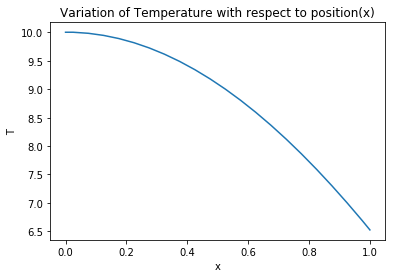

In [846]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(grid.xP, T)
print(T)
T32 = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 32 time steps

In [847]:
import numpy as np
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
L    = 1
t2   = 3.2632 

Tana = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t2/L**2))*np.cos(zeta*grid.xP/L)


In [848]:
import numpy as np
# This formula is derived in the analytical solution section
#Tana = 111.91*np.exp(-2.415146825)*np.cos(0.8603*grid.xP) 
difference = np.absolute(np.array(T) - np.array(Tana))
ebar32 = sum (difference/(ncv+2))
t32 = dt

## For 16 time steps

In [849]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 16
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
# Note: If there are a lot of timesteps, this will cost a
#       lot of memory. It is suggested to set a parameter to 
#       only store the solution every N timesteps.
T_solns = [np.copy(T)]

# Define the transient model
Toldold = np.copy(Told)
Told = np.copy(T)

transient1 = FirstOrderTransientModel(grid, T,Told, rho, cp, dt)
transient2 = SecondOrderTransientModel(grid, T,Told,Toldold, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Toldold[:] = Told[:]
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        
        if tStep == 0:
            coeffs = transient1.add(coeffs)
        else:
            coeffs = transient2.add(coeffs)
        #coeffs = transient.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 0.62910625
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 3.4994229736184934e-13; Avg. Resid. = 1.3350431871117507e-13
Timestep = 1; Time = 0.8047124999999999
Iteration = 0; Max. Resid. = 3.9285327577034574; Avg. Resid. = 3.4625557274484686
Iteration = 1; Max. Resid. = 2.3314683517128287e-13; Avg. Resid. = 1.1388667786604855e-13
Timestep = 2; Time = 0.9803187499999999
Iteration = 0; Max. Resid. = 3.510891328111379; Avg. Resid. = 3.094501749397174
Iteration = 1; Max. Resid. = 1.5409895581797173e-13; Avg. Resid. = 6.793454687681333e-14
Timestep = 3; Time = 1.1559249999999999
Iteration = 0; Max. Resid. = 3.102869294707225; Avg. Resid. = 2.734893430064768
Iteration = 1; Max. Resid. = 2.5224267119483557e-13; Avg. Resid. = 1.1470824290427118e-13
Timestep = 4; Time = 1.3315312499999998
Iteration = 0; Max. Resid. = 2.73033708164012; Avg. Resid. = 2.4065452645800964
Iteration = 1; Max. Resid. = 1.35669253609194

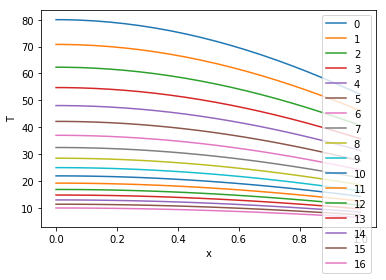

In [850]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
for T in T_solns:
    plt.plot(grid.xP, T, label=str(i))
    i += 1
T16 = max(T)
plt.xlabel("x")
plt.ylabel("T")
plt.legend()
plt.show()

## Calculation of Error for 16 time steps

In [851]:
import numpy as np
# This formula is derived in the analytical solution section
#Tana = 111.91*np.exp(-2.415146825)*np.cos(0.8603*grid.xP) 
difference = np.absolute(np.array(T) - np.array(Tana))
ebar16 = sum (difference/(ncv+2))
t16 = dt

## For 8 time steps

In [852]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 8
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
# Note: If there are a lot of timesteps, this will cost a
#       lot of memory. It is suggested to set a parameter to 
#       only store the solution every N timesteps.
T_solns = [np.copy(T)]

# Define the transient model
Toldold = np.copy(Told)
Told = np.copy(T)

transient1 = FirstOrderTransientModel(grid, T,Told, rho, cp, dt)
transient2 = SecondOrderTransientModel(grid, T,Told,Toldold, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Toldold[:] = Told[:]
    Told[:] = T[:]

    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        
        if tStep == 0:
            coeffs = transient1.add(coeffs)
        else:
            coeffs = transient2.add(coeffs)
        #coeffs = transient.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 0.8047124999999999
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 3.672617765460018e-13; Avg. Resid. = 1.0542677841840487e-13
Timestep = 1; Time = 1.1559249999999999
Iteration = 0; Max. Resid. = 3.5233218086090754; Avg. Resid. = 3.1054323038433678
Iteration = 1; Max. Resid. = 1.6697754290362354e-13; Avg. Resid. = 8.033573806187633e-14
Timestep = 2; Time = 1.5071374999999998
Iteration = 0; Max. Resid. = 2.829549304010432; Avg. Resid. = 2.4939839738089815
Iteration = 1; Max. Resid. = 3.461675390781238e-13; Avg. Resid. = 1.3802847753652259e-13
Timestep = 3; Time = 1.8583499999999997
Iteration = 0; Max. Resid. = 2.214598174066163; Avg. Resid. = 1.9519693742297513
Iteration = 1; Max. Resid. = 1.794120407794253e-13; Avg. Resid. = 7.39575067854048e-14
Timestep = 4; Time = 2.2095624999999997
Iteration = 0; Max. Resid. = 1.7128519078556155; Avg. Resid. = 1.5097236954708237
Iteration = 1; Max. Resid. = 1.2123635

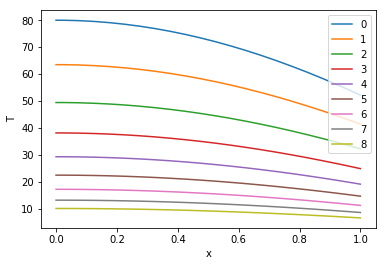

In [853]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
for T in T_solns:
    plt.plot(grid.xP, T, label=str(i))
    i += 1
T8 = max(T)
plt.xlabel("x")
plt.ylabel("T")
plt.legend()
plt.show()

## Calculation of Error for 8 time steps

In [854]:
import numpy as np
# This formula is derived in the analytical solution section
#Tana = 111.91*np.exp(-2.415146825)*np.cos(0.8603*grid.xP) 
difference = np.absolute(np.array(T) - np.array(Tana))
ebar8 = sum (difference/(ncv+2))
t8 = dt

## For 4 time steps

In [855]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 4
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model
Toldold = np.copy(Told)
Told = np.copy(T)

transient1 = FirstOrderTransientModel(grid, T,Told, rho, cp, dt)
transient2 = SecondOrderTransientModel(grid, T,Told,Toldold, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Toldold[:] = Told[:]
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        
        if tStep == 0:
            coeffs = transient1.add(coeffs)
        else:
            coeffs = transient2.add(coeffs)
        #coeffs = transient.add(coeffs)
        
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 1.1559249999999999
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 2.1449508835758024e-13; Avg. Resid. = 1.0387246618392965e-13
Timestep = 1; Time = 1.8583499999999997
Iteration = 0; Max. Resid. = 2.9208038507800076; Avg. Resid. = 2.574390941566059
Iteration = 1; Max. Resid. = 1.6631140908884845e-13; Avg. Resid. = 8.468781231840694e-14
Timestep = 2; Time = 2.5607749999999996
Iteration = 0; Max. Resid. = 1.9185795255335978; Avg. Resid. = 1.6910545857335575
Iteration = 1; Max. Resid. = 1.511013536514838e-13; Avg. Resid. = 6.283029652109917e-14
Timestep = 3; Time = 3.2631999999999994
Iteration = 0; Max. Resid. = 1.1767491536452983; Avg. Resid. = 1.0371988842095503
Iteration = 1; Max. Resid. = 8.132383655379272e-14; Avg. Resid. = 2.860767178702872e-14


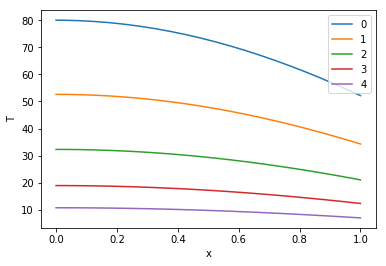

In [856]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
for T in T_solns:
    plt.plot(grid.xP, T, label=str(i))
    i += 1
T4 = max(T)
plt.xlabel("x")
plt.ylabel("T")
plt.legend()
plt.show()

## Calculation of Error for 4 time steps

In [857]:
import numpy as np
# This formula is derived in the analytical solution section
#Tana = 111.91*np.exp(-2.415146825)*np.cos(0.8603*grid.xP) 
difference = np.absolute(np.array(T) - np.array(Tana))
ebar4 = sum (difference/(ncv+2))
t4 = dt

## For 2 time steps

In [858]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 2
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
# Note: If there are a lot of timesteps, this will cost a
#       lot of memory. It is suggested to set a parameter to 
#       only store the solution every N timesteps.
T_solns = [np.copy(T)]

# Define the transient model
Toldold = np.copy(Told)
Told = np.copy(T)

transient1 = FirstOrderTransientModel(grid, T,Told, rho, cp, dt)
transient2 = SecondOrderTransientModel(grid, T,Told,Toldold, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Toldold[:] = Told[:]
    Told[:] = T[:]

    
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        
        if tStep == 0:
            coeffs = transient1.add(coeffs)
        else:
            coeffs = transient2.add(coeffs)
        #coeffs = transient.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))
   

Timestep = 0; Time = 1.85835
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 2.90878432451791e-13; Avg. Resid. = 1.1989298442927066e-13
Timestep = 1; Time = 3.2632
Iteration = 0; Max. Resid. = 2.176434850407286; Avg. Resid. = 1.9183117799260767
Iteration = 1; Max. Resid. = 1.3444800828210646e-13; Avg. Resid. = 6.503964034010324e-14


[0.    0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525
 0.575 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.   ]


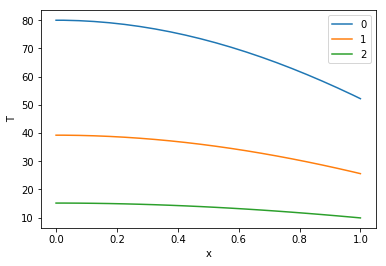

[15.13665102 15.13665102 15.10864927 15.05269758 14.96889946 14.8574099
 14.71843516 14.55223231 14.35910881 14.1394219  13.89357797 13.6220318
 13.3252857  13.0038886  12.65843503 12.28956401 11.89795791 11.4843411
 11.0494787  10.59417512 10.11927257  9.87246104]


In [862]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
i = 0
for T in T_solns:
    plt.plot(grid.xP, T, label=str(i))
    i += 1
T2 = max(T)
print (grid.xP)
plt.xlabel("x")
plt.ylabel("T")
plt.legend()
plt.show()
print(T)

## Calculation of Error for 2 time steps

In [860]:
import numpy as np
# This formula is derived in the analytical solution section
#Tana = 111.91*np.exp(-2.415146825)*np.cos(0.8603*grid.xP) 
difference = np.absolute(np.array(T) - np.array(Tana))
ebar2 = sum (difference/(ncv+2))
t2 = dt
print(ebar2)

4.503889350587573


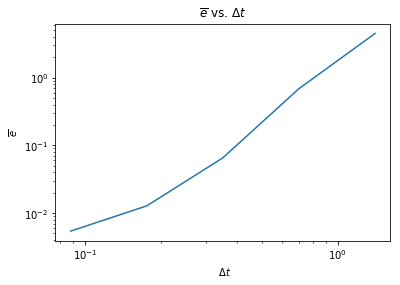

2.515456500637571 0.3974607762482105
[ 1.50494132 -0.37285111 -2.72574076 -4.36013374 -5.21932526] [ 0.33993054 -0.35321665 -1.04636383 -1.73951101 -2.43265819]
[4.503889350587573, 0.6887677768915138, 0.06549766663894191, 0.0127766787324001, 0.005410978872556501] [1.40485, 0.702425, 0.3512125, 0.17560625, 0.087803125]


In [861]:
import numpy as np
ebar = [ebar2, ebar4, ebar8, ebar16, ebar32]
t    = [t2, t4, t8, t16, t32]
plt.loglog(t, ebar)
plt.title("$\overline{e}$ vs. $\Delta t$ ")
plt.xlabel(" $\Delta t$")
plt.ylabel("$\overline{e}$")
plt.show()
y = np.log(ebar)
x = np.log(t)
A = np.vstack([x, np.ones(len(x))]).T
p, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(p, c)
print(y,x)
print (ebar,t)